# Advance Regression Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house. 

### Reading,understanding and visualizing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import os
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
hp = pd.read_csv("train.csv", encoding = 'utf-8')
hp.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hp.shape

(1460, 81)

In [4]:
hp.drop(['Id'],axis=1,inplace=True)

#### Check for Missing Values

In [5]:
round(100*(hp.isnull().sum()/len(hp.index)),2)

MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
                 ...  
BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual 

In [6]:
# delete some features with very high number of missing values.  
hp.drop(['PoolQC','Alley','Fence','MiscFeature','FireplaceQu'],axis=1,inplace=True)


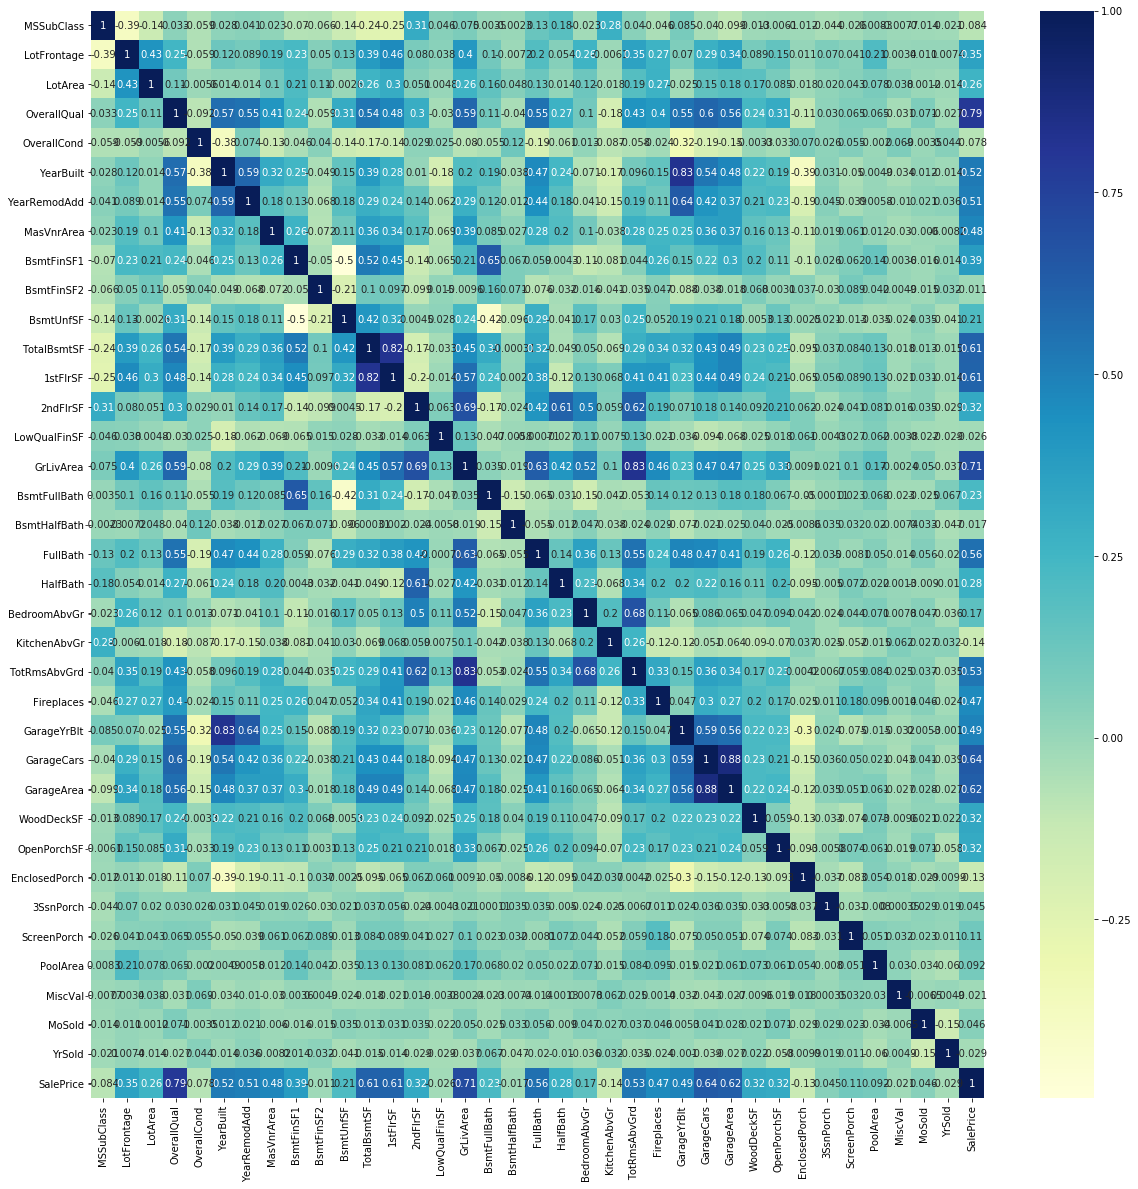

In [7]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(hp.corr(), ax=ax,annot = True, cmap="YlGnBu");

#### The heatmap shows some useful insights:

#### Sale Price is highly (positively) correlated with OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF,  1stFlrSF, GrLivArea, FullBath, TotrmsAbvGrd, GarageCars, GarageArea

#### Converting Year columns to date and time format

In [8]:
hp['CurrentYear'] = datetime.datetime.now().year
hp["HouseAge"] = hp['CurrentYear'] - hp['YearBuilt'] 
hp["RemodAge"] = hp['CurrentYear'] - hp['YearRemodAdd'] 
hp["Housesold"] = hp['CurrentYear'] - hp['YrSold'] 
hp["FstFlrSF"] = hp['1stFlrSF']
hp.drop(['YearBuilt', 'YearRemodAdd','1stFlrSF','YrSold'],axis=1,inplace=True)

#### Visualizing relation between highly correlated variables

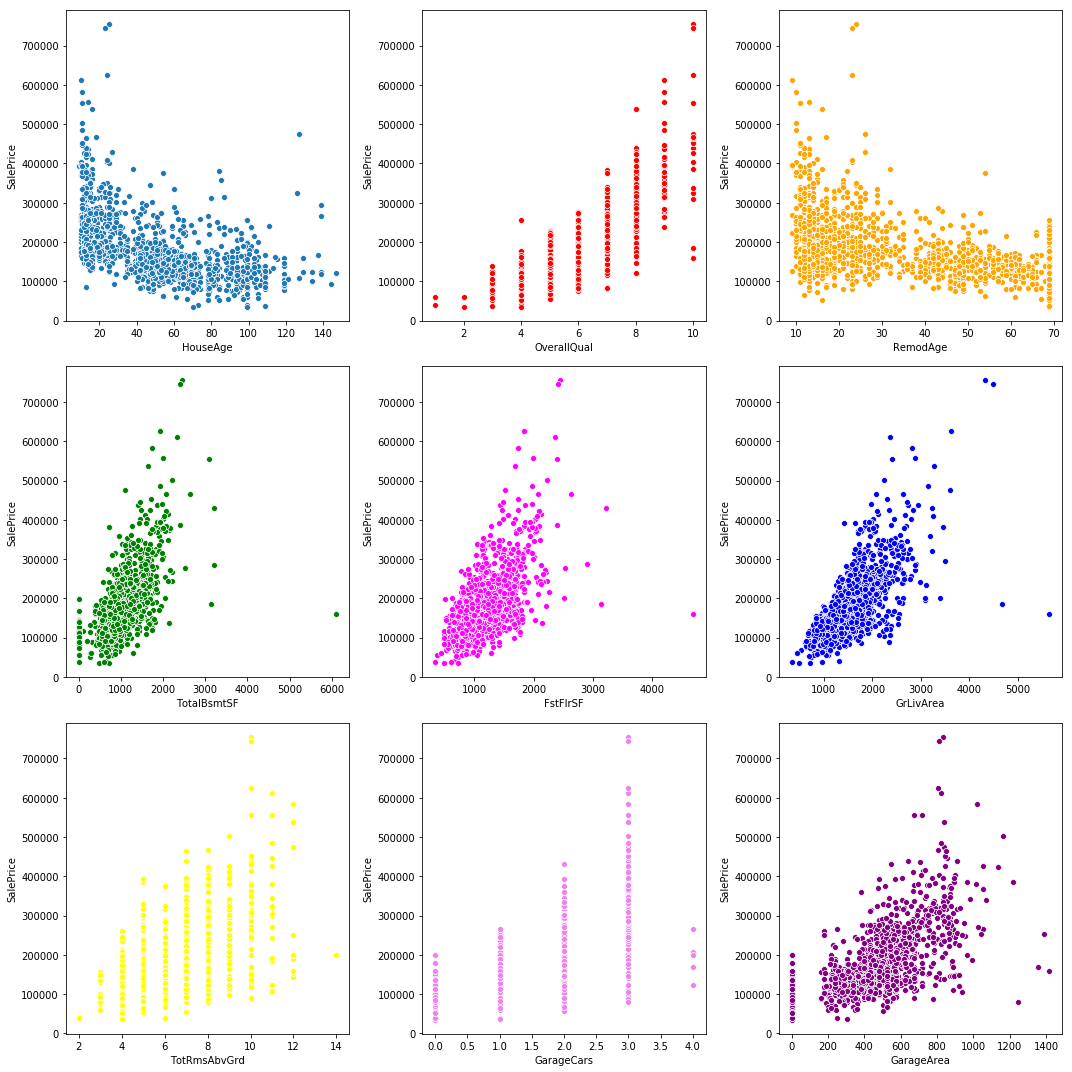

In [9]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.scatterplot(x= hp.HouseAge, y=hp.SalePrice, ax = axs[0,0])
sns.scatterplot(x= hp.OverallQual, y=hp.SalePrice, ax = axs[0,1],color="red")
sns.scatterplot(x= hp.RemodAge, y=hp.SalePrice, ax = axs[0,2],color="orange")
sns.scatterplot(x= hp.TotalBsmtSF, y=hp.SalePrice, ax = axs[1,0],color="green")
sns.scatterplot(x= hp.FstFlrSF, y=hp.SalePrice, ax = axs[1,1],color="magenta")
sns.scatterplot(x= hp.GrLivArea, y=hp.SalePrice, ax = axs[1,2],color="blue")
sns.scatterplot(x= hp.TotRmsAbvGrd, y=hp.SalePrice, ax = axs[2,0],color="yellow")
sns.scatterplot(x= hp.GarageCars, y=hp.SalePrice, ax = axs[2,1],color="violet")
sns.scatterplot(x= hp.GarageArea, y=hp.SalePrice, ax = axs[2,2],color="purple")

plt.tight_layout()


#### From the visualizations above, following inferences can be derived:

1) Sale Price decreases with increase in House age 

2) Sale Price increases with increase in OverallQual

3) Sale Price decreases with increase in Remod age

4) Sale Price increases with increase in TotalBsmtSF

5) Sale Price increases with increase in FstflrSF

6) Sale Price increases with increase in GrLivArea

7) Sale Price increases with increase in TotRmsAbvGrd

8) Sale Price increases with increase in GarageCars

9) Sale Price increases with increase in GarageArea

#### Imputing missing values in columns having high correlation

In [10]:
hp['LotFrontage'].fillna(np.mean(hp['LotFrontage']),inplace=True)
hp['LotFrontage'].isna().sum()
hp['GarageYrBlt'].fillna(0,inplace=True)
hp['GarageArea'].fillna(0,inplace=True)
hp['GarageCars'].fillna(0,inplace=True)
hp['GarageQual'].fillna('None',inplace=True)   
hp['GarageFinish'].fillna('None',inplace=True)   
hp['GarageCond'].fillna('None',inplace=True)   
hp['GarageType'].fillna('None',inplace=True)  

#missing values are likely zero for having no basement

for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    hp[col].fillna(0,inplace=True)
    
# for categorical features we will create a separate class 'none' as before.

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    hp[col].fillna('None',inplace=True)
    
hp['MasVnrArea'].fillna(0,inplace=True)
hp['MasVnrType'].fillna('None',inplace=True)
hp['MSZoning'].fillna(hp['MSZoning'].mode()[0],inplace=True)
hp.drop(['Utilities'],axis=1,inplace=True)
hp['Functional'].fillna(hp['Functional'].mode()[0],inplace=True)
for col in ['SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']:
  hp[col].fillna(hp[col].mode()[0],inplace=True)
print(hp.isnull().sum())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold      

#### LabelEncode the Categorical Features

In [11]:
for col in hp.columns:
    if(hp[col].dtype == 'object'):
        le=LabelEncoder()
        hp[col]=le.fit_transform(hp[col])


#### Split dataset into train and test data

In [12]:
x_train,x_test,y_train,y_test=train_test_split(hp.drop(['SalePrice'],axis=1),hp['SalePrice'],test_size=0.20,random_state=42)

print(x_train.shape)
print(x_test.shape)

(1168, 74)
(292, 74)


## Model Building and Evaluation

### Lasso regression

In [13]:
params = {'alpha': [ 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,300,400,500,1000]}
folds = 5

In [14]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordi

C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might wa

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [15]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.243740,0.161952,0.006250,0.007655,1,{'alpha': 1.0},-22415.735139,-21533.939764,-22642.105934,-19965.031546,...,-20782.274687,1960.293141,18,-18878.939434,-18411.402023,-16779.402906,-19417.857425,-19515.790660,-18600.678490,993.530189
1,0.215667,0.145074,0.000000,0.000000,2,{'alpha': 2.0},-22409.484965,-21529.189593,-22639.783338,-19960.911739,...,-20778.965412,1958.467230,17,-18876.967017,-18409.976118,-16778.159205,-19416.381803,-19513.946358,-18599.086100,993.347543
2,0.212493,0.142059,0.006250,0.007655,3,{'alpha': 3.0},-22403.235063,-21524.439422,-22637.460738,-19956.791932,...,-20775.663013,1956.630756,16,-18875.126442,-18408.619116,-16776.915514,-19414.906180,-19512.102064,-18597.533863,993.169683
3,0.215943,0.138470,0.003106,0.006212,4,{'alpha': 4.0},-22396.985161,-21519.689252,-22635.138111,-19952.672125,...,-20772.364256,1954.789257,15,-18873.285867,-18407.285997,-16775.671830,-19413.430557,-19510.257767,-18595.986404,992.990942
4,0.218740,0.147570,0.006250,0.007654,5,{'alpha': 5.0},-22390.735259,-21514.939081,-22632.815521,-19948.552318,...,-20769.065492,1952.949188,14,-18871.450313,-18406.114489,-16774.428139,-19411.954934,-19508.413440,-18594.472263,992.806376


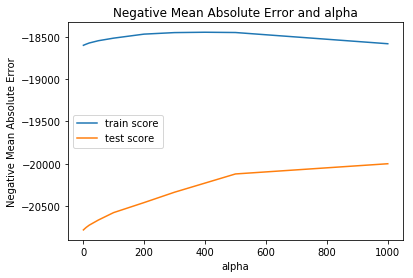

In [16]:
# plotting mean test and train scores with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center left')
plt.show()

In [17]:
# Checking best parameter (alpha)
model_cv.best_params_

{'alpha': 1000}

In [18]:
alpha = 1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lasso.coef_

array([-2.23451170e+02, -0.00000000e+00, -2.09466990e+02,  4.80770808e-01,
        0.00000000e+00, -3.64410680e+02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.66708790e+02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -1.98874790e+02,  1.31464641e+04,  2.94043502e+03,
        1.47271772e+03,  8.20460907e+02, -3.93946948e+02,  0.00000000e+00,
        1.73606182e+03,  2.02314293e+01, -5.54245260e+03,  0.00000000e+00,
        0.00000000e+00, -5.25479170e+03,  1.15540935e+03, -3.56639894e+03,
       -7.22293562e+02,  9.82831612e+00,  0.00000000e+00,  4.49267110e+00,
       -2.15481481e+00,  0.00000000e+00, -0.00000000e+00, -6.02724090e+02,
        0.00000000e+00, -0.00000000e+00,  1.15339882e+01, -1.94067444e+00,
        3.92428961e+01,  1.00737300e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.11742907e+03,
        6.34962308e+02,  3.21917316e+03,  3.59385536e+03, -0.00000000e+00,
       -4.56990703e+00, -

In [20]:
coef = pd.Series(lasso.coef_, index = x_train.columns)
coef

MSSubClass        -223.451170
MSZoning            -0.000000
LotFrontage       -209.466990
LotArea              0.480771
Street               0.000000
LotShape          -364.410680
LandContour          0.000000
LotConfig           -0.000000
LandSlope            0.000000
Neighborhood       366.708790
Condition1          -0.000000
Condition2          -0.000000
BldgType            -0.000000
HouseStyle        -198.874790
OverallQual      13146.464074
OverallCond       2940.435022
RoofStyle         1472.717716
RoofMatl           820.460907
Exterior1st       -393.946948
Exterior2nd          0.000000
MasVnrType        1736.061820
MasVnrArea          20.231429
ExterQual        -5542.452601
ExterCond            0.000000
Foundation           0.000000
BsmtQual         -5254.791705
BsmtCond          1155.409347
BsmtExposure     -3566.398940
BsmtFinType1      -722.293562
BsmtFinSF1           9.828316
                     ...     
HalfBath             0.000000
BedroomAbvGr        -0.000000
KitchenAbv

In [21]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 46 variables and eliminated the other 28 variables


### Ridge regression

In [22]:
ridge = Ridge()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    1.7s finished
C:\Users\Jitmanyu\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [23]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015621,0.009879,0.003125,0.006249,1,{'alpha': 1.0},-22337.688634,-21476.425435,-22634.086195,-19916.115435,...,-20746.288130,1941.119644,18,-18866.403859,-18411.160433,-16778.202774,-19406.759414,-19498.759253,-18592.257147,988.322389
1,0.015626,0.009881,0.006250,0.007654,2,{'alpha': 2.0},-22280.604478,-21469.366829,-22621.921750,-19889.485918,...,-20726.926926,1929.028433,17,-18855.339183,-18405.074526,-16776.900621,-19394.506478,-19482.313990,-18582.826960,983.374734
2,0.012500,0.006250,0.003125,0.006249,3,{'alpha': 3.0},-22235.373432,-21470.339063,-22609.215865,-19861.062609,...,-20710.381846,1920.895201,16,-18845.538779,-18397.531378,-16775.488740,-19382.547745,-19467.632311,-18573.747791,978.963235
3,0.012501,0.006250,0.003125,0.006250,4,{'alpha': 4.0},-22196.711339,-21469.079952,-22597.536300,-19832.053514,...,-20694.394598,1914.704186,15,-18838.281167,-18389.996103,-16774.496480,-19371.200497,-19455.733413,-18565.941532,975.148464
4,0.015624,0.000003,0.000000,0.000000,5,{'alpha': 5.0},-22162.618434,-21466.528701,-22586.970460,-19803.745600,...,-20679.169872,1909.827762,14,-18832.005989,-18383.103202,-16773.556350,-19360.565419,-19445.286423,-18558.903477,971.729559


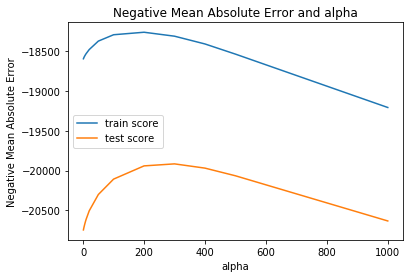

In [24]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='center left')
plt.show()

In [25]:
model_cv.best_params_

{'alpha': 300}

In [26]:
alpha = 300
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)
ridge.coef_

array([-1.84058685e+02, -1.00704368e+03, -2.20002620e+02,  4.23019894e-01,
        2.15507607e+02, -8.61324572e+02,  1.11099924e+03,  8.44671927e+01,
        1.66918707e+03,  4.40290663e+02, -1.86126735e+02, -2.29247529e+03,
       -1.08656208e+03, -8.88539184e+02,  1.01832015e+04,  3.50872857e+03,
        2.50454185e+03,  2.55452766e+03, -8.53496043e+02,  4.02294996e+02,
        2.91126547e+03,  2.51948693e+01, -5.27478562e+03,  7.18456471e+00,
        7.26129020e+02, -5.17508120e+03,  1.75432643e+03, -3.75658607e+03,
       -8.86013357e+02,  5.07381178e+00,  4.13095695e+02,  3.50457700e+00,
       -3.98606305e+00,  4.59232573e+00, -2.45014319e+02, -9.72486300e+02,
        3.66509823e+02, -9.61266290e+01,  1.73746462e+01,  3.01179702e-02,
        3.50208537e+01,  2.84161802e+03, -5.71471113e+02,  4.88638516e+02,
       -1.21514260e+02, -2.02476360e+03, -1.48582839e+03, -7.33271738e+03,
        1.94050126e+03,  3.58080907e+03,  3.81799163e+03, -3.24636910e+02,
       -4.89893245e+00, -

In [27]:
coef1 = pd.Series(ridge.coef_, index = x_train.columns)
coef1

MSSubClass        -184.058685
MSZoning         -1007.043682
LotFrontage       -220.002620
LotArea              0.423020
Street             215.507607
LotShape          -861.324572
LandContour       1110.999238
LotConfig           84.467193
LandSlope         1669.187071
Neighborhood       440.290663
Condition1        -186.126735
Condition2       -2292.475294
BldgType         -1086.562079
HouseStyle        -888.539184
OverallQual      10183.201532
OverallCond       3508.728571
RoofStyle         2504.541855
RoofMatl          2554.527662
Exterior1st       -853.496043
Exterior2nd        402.294996
MasVnrType        2911.265473
MasVnrArea          25.194869
ExterQual        -5274.785624
ExterCond            7.184565
Foundation         726.129020
BsmtQual         -5175.081203
BsmtCond          1754.326427
BsmtExposure     -3756.586074
BsmtFinType1      -886.013357
BsmtFinSF1           5.073812
                     ...     
HalfBath          -121.514260
BedroomAbvGr     -2024.763603
KitchenAbv

In [28]:
print("Ridge picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  str(sum(coef1 == 0)) + " variables")

Ridge picked 73 variables and eliminated the other 1 variables


#### After analysing both Ridge regression and Lasso regression models,top features determining house price shall be:

#### OverallQual
#### OverallCond     
#### Functional
#### Fireplaces           
#### GarageCars